In [1]:
!pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=f42a4c4f03fbf5ebfc7ad7685c1ca316f65272baf8be8d9223e604a5e3852010
  Stored in directory: c:\users\arsalan\appdata\local\pip\cache\wheels\d5\1a\3e\6193fe1c56168f5df4aef57d8411033ba4611881135d495727
Successfully built pyforest


In [2]:
from pyforest import *

In [3]:
lazy_imports()

['from sklearn.preprocessing import RobustScaler',
 'import plotly as py',
 'from sklearn.linear_model import RidgeCV',
 'import tensorflow as tf',
 'import lightgbm as lgb',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn import metrics',
 'from sklearn.model_selection import RandomizedSearchCV',
 'import torch',
 'from pyspark import SparkContext',
 'from sklearn.manifold import TSNE',
 'from xlrd import open_workbook',
 'import seaborn as sns',
 'from sklearn.preprocessing import OneHotEncoder',
 'import pandas as pd',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn import svm',
 'import statistics',
 'from sklearn.model_selection import train_test_split',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import altair as alt',
 'import keras',
 'from sklearn.preprocessing import StandardScaler',
 'from sklearn.linear_model import ElasticNet',
 'from sklearn.model_selec

In [4]:
df = pd.read_csv("BankNote_Authentication.csv")
df.head()

<IPython.core.display.Javascript object>

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.shape

(1372, 5)

In [6]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [7]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [8]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

**Data Visualization**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Arsalan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of class Attributes'}, xlabel='class', ylabel='Density'>

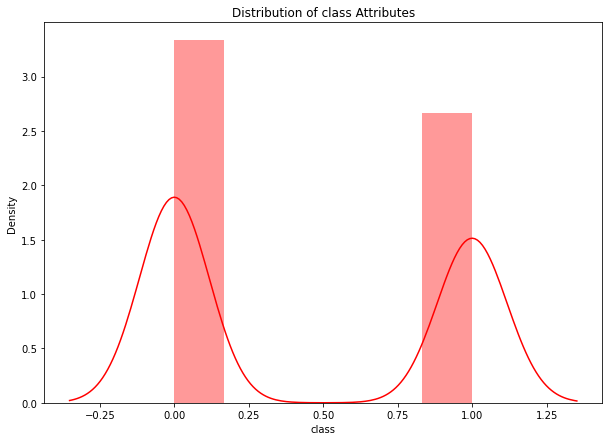

In [13]:
plt.figure(figsize=(10,7))
plt.title('Distribution of class Attributes')
sns.distplot(df['class'],color='red',kde=True)

array([[<AxesSubplot:title={'center':'variance'}>,
        <AxesSubplot:title={'center':'skewness'}>,
        <AxesSubplot:title={'center':'curtosis'}>],
       [<AxesSubplot:title={'center':'entropy'}>,
        <AxesSubplot:title={'center':'class'}>, <AxesSubplot:>]],
      dtype=object)

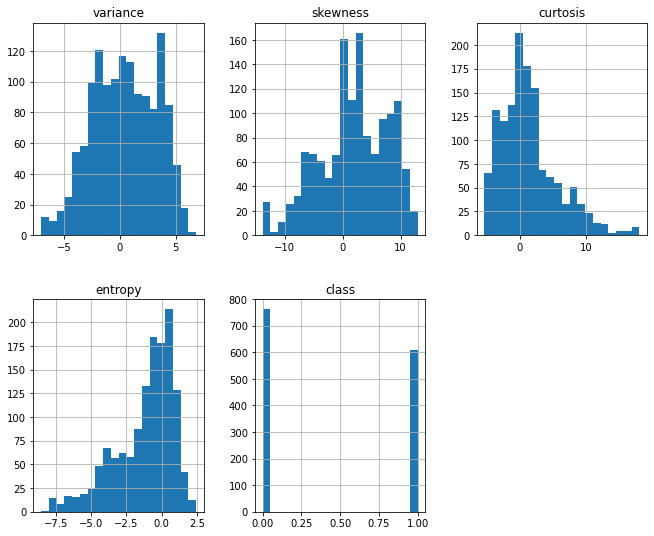

In [15]:
df.hist(bins=20,figsize=(11,9),layout=(2,3))

<IPython.core.display.Javascript object>

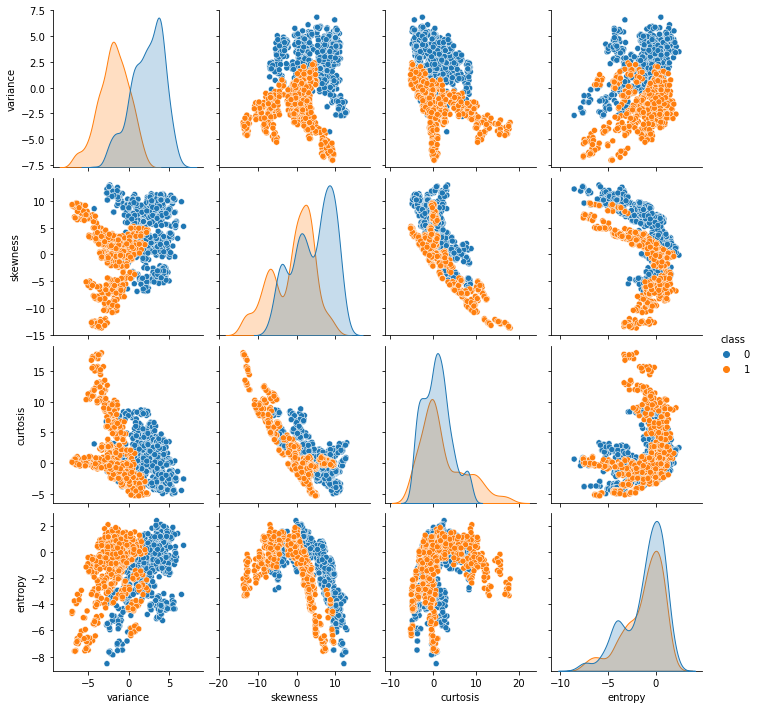

In [16]:
sns.pairplot(df,hue='class');



**Data Preparation**

In [17]:
X = df.drop('class',axis=1)
y = df['class']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [21]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X=scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print("X_train:\n", X_train)
print("\n")
print("X_test:\n", X_test)

X_train:
 [[-1.58438248  0.1072115  -0.14276339  0.03334576]
 [-1.08829139 -2.53123321  2.67783284 -0.35092979]
 [ 1.13672843 -0.15348755 -0.16820608  0.86368769]
 ...
 [-1.6900361   0.72314447 -0.19588896 -2.05114485]
 [ 0.57766241  0.02698182  0.1851622   0.52080477]
 [-0.9644631   0.30908695 -0.49734797 -0.03521515]]


X_test:
 [[-1.40564511 -0.03629527 -0.25946279 -0.55356298]
 [ 0.27456924  0.39719812  0.19050204  0.69982149]
 [-1.56677623 -1.70567084  2.36049857 -0.08188265]
 ...
 [ 0.33303672  0.90277959 -0.894603    0.10774845]
 [ 0.24291663 -0.00314587 -0.98169159  0.65423293]
 [ 0.44734548  0.89770987 -0.5083209  -0.56573811]]


**Model Building**

**LogisticRegression**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
classifire = LogisticRegression(solver='liblinear',random_state=1)

classifire.fit(X_train, y_train)
accuracies = cross_val_score(estimator = classifire,X=X_train,y=y_train,cv=10)

print("Accuracies:\n ",accuracies)

Accuracies:
  [0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [25]:
print("Mean Accuracies: ",accuracies.mean())

Mean Accuracies:  0.9835863219349459


In [26]:
classifire_pred = classifire.predict(X_test)
classifire_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

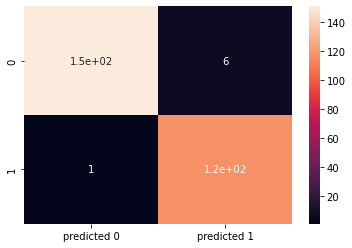

In [27]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,classifire_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])

sns.heatmap(df_cm,annot=True)

**Support vector Machine**

In [28]:
from sklearn.svm import SVC
svm_classifire = SVC(kernel="linear")

svm_classifire.fit(X_train,y_train)

svm_accuracies = cross_val_score(estimator=svm_classifire,X=X_train,y=y_train,cv=10)

print("Accuracies:\n ",svm_accuracies)

Accuracies:
  [0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [29]:
print("Mean Accuracy:",svm_accuracies.mean())

Mean Accuracy: 0.9854045037531277


In [30]:
svm_classifire_pred = svm_classifire.predict(X_test)
svm_classifire_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

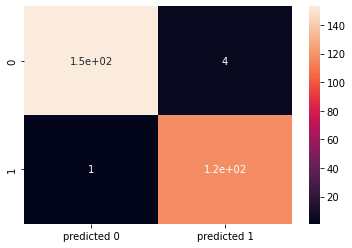

In [31]:
cm = metrics.confusion_matrix(y_test,svm_classifire_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])

sns.heatmap(df_cm,annot=True)

**RandomForest**

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier(n_estimators=50, criterion='entropy',random_state=1)
rfc_classifier.fit(X_train, y_train)

rfc_accuracies = cross_val_score(estimator=rfc_classifier,X=X_train,y=y_train,cv=10)

print("Accuracies:\n ",rfc_accuracies)

Accuracies:
  [0.98181818 0.99090909 0.99090909 0.98181818 0.99090909 0.99090909
 1.         1.         1.         1.        ]


In [33]:
print("Mean Accuracy:",rfc_accuracies.mean())

Mean Accuracy: 0.9927272727272728


In [34]:
rfc_classifier_pred = rfc_classifier.predict(X_test)
rfc_classifier_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

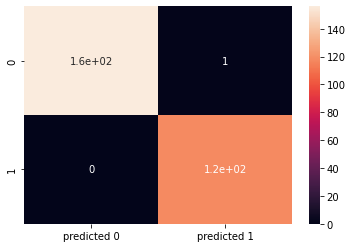

In [35]:
cm = metrics.confusion_matrix(y_test,rfc_classifier_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])

sns.heatmap(df_cm,annot=True)

**KNN**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {'leaf_size': [2,5,7,9,11],'n_neighbors':[2,5,7,9,11],'p':[1,2]}

grid = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid)

grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [37]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [38]:
KNN = KNeighborsClassifier(n_neighbors=2 ,p=1 ,leaf_size=2 )

In [39]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [40]:
KNN_pred = KNN.predict(X_test)

In [41]:
knn_accuracies = cross_val_score(estimator=KNN,X=X_train,y=y_train,cv=10)

print("Accuracies:\n ",knn_accuracies)

Accuracies:
  [0.99090909 0.99090909 0.99090909 1.         1.         1.
 1.         1.         1.         1.        ]


In [42]:
print("Mean Accuracy:",knn_accuracies.mean())

Mean Accuracy: 0.9972727272727273


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

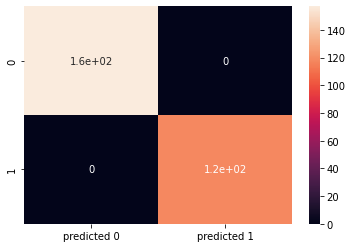

In [43]:
cm = metrics.confusion_matrix(y_test,KNN_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])

sns.heatmap(df_cm,annot=True)

**Multilayer Preception (Neural Network)**

In [44]:
from sklearn.neural_network import MLPClassifier 
multi_class = MLPClassifier(hidden_layer_sizes=(8,4),max_iter=8000, alpha=0.0001, solver='sgd',verbose=10,random_state= 21,tol=0.000000001)

In [45]:
multi_class.fit(X_train, y_train)

Iteration 1, loss = 1.02065261
Iteration 2, loss = 1.00232763
Iteration 3, loss = 0.97715486
Iteration 4, loss = 0.94973488
Iteration 5, loss = 0.92231418
Iteration 6, loss = 0.89651964
Iteration 7, loss = 0.87283524
Iteration 8, loss = 0.85051410
Iteration 9, loss = 0.83056223
Iteration 10, loss = 0.81132826
Iteration 11, loss = 0.79467501
Iteration 12, loss = 0.77862224
Iteration 13, loss = 0.76455037
Iteration 14, loss = 0.75105250
Iteration 15, loss = 0.73882781
Iteration 16, loss = 0.72727541
Iteration 17, loss = 0.71657090
Iteration 18, loss = 0.70615519
Iteration 19, loss = 0.69650376
Iteration 20, loss = 0.68705241
Iteration 21, loss = 0.67795411
Iteration 22, loss = 0.66915932
Iteration 23, loss = 0.66056959
Iteration 24, loss = 0.65225336
Iteration 25, loss = 0.64391579
Iteration 26, loss = 0.63595619
Iteration 27, loss = 0.62803230
Iteration 28, loss = 0.62041858
Iteration 29, loss = 0.61270498
Iteration 30, loss = 0.60516212
Iteration 31, loss = 0.59779594
Iteration 32, los

C:\Users\Arsalan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=8000, random_state=21,
              solver='sgd', tol=1e-09, verbose=10)

In [46]:
multi_class_predict=multi_class.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

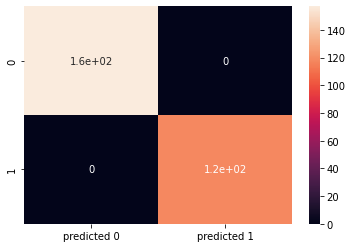

In [47]:
cm = metrics.confusion_matrix(y_test,multi_class_predict,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])

sns.heatmap(df_cm,annot=True)

**Comparing All the Algorithms**

In [48]:
print("LogisticRegression: {0:.4f}%".format(accuracies.mean()*100))
print("\n")
print("Support Vector Machine: {0:.4f}%".format(svm_accuracies.mean()*100))
print("\n")
print("Random Forest: {0:.4f}%".format(rfc_accuracies.mean()*100))
print("\n")
print("KNN: {0:.4f}%".format(knn_accuracies.mean()*100))
print("\n")
print("Nueral Network: {}%".format(100))
print("\n")

LogisticRegression: 98.3586%


Support Vector Machine: 98.5405%


Random Forest: 99.2727%


KNN: 99.7273%


Nueral Network: 100%


